<a href="https://colab.research.google.com/github/LeeJuCheon/TIL_devcourse/blob/main/week9/week9_4_3_Pytorch_Tutorial(Autograd%2CMLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Autograd

* autograd 패키지는 모든 연산에 대한 자동 미분 제공
* 실행-기반-정의 프레임워크

# Tensor
* torch.Tensor 클래스의 .requires_grad 속성을 True로 설정하면, 해당 텐서에서 이루어진 모든 연산을 추적
* 계산이 완료된 후 .backward()를 호출하여 모든 gradient를 자동으로 계산할 수 있으며 이 Tensor의 변화도는 .grad 속성에 누적됨
* Tensor가 기록을 추적하는 것을 중단하게 하려면, .detach()를 호출하여 연산기록으로부터 분리하여 연산이 추적되는 것을 방지할 수 있음
* 기록을 추적하는 것과 메모리를 사용하는 것을 방지하기 위해서 코드블럭을 with torch.no_grad():로 감쌀 수 있음
* gradient는 필요없지만 requires_grad=True가 설정되어 학습 가능한 매개변수를 갖는 모델을 평가할 때 유용
* Autograd 구현에서 Function 클래스는 매우 중요한 역할을 수행
* Tensor와 Function은 서로 연결되어 있고 모든 연산 과정을 부호화하여 순환하지 않는 그래프를 생성
* 각 tensor는 .grad_fn 속성을 가지고 있는데 이는 Tensor를 생성한 Function을 참조함
* 도함수를 계산하기 위해서는 Tensor의 .backward()를 호출하면 됨

In [1]:
from __future__ import print_function     # 파이썬 버전에 상관없이 print() 출력가능
import torch

torch.__version__

'1.10.0+cu111'

In [2]:
x = torch.ones(2,2,requires_grad=True)  # x의 연산과정 추적
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [3]:
print(x.grad_fn)      # 직접 생성되었기 때문에 None

None


In [4]:
y= x+2
y.retain_grad()
print(y)          # 덧셈에 의해 생성됨 "Add"Backward

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [6]:
z = y*y*3
out = z.mean()

print(z)        # 곱셉 "Mul"Backward
print(out)      # meanBackward

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>)
tensor(27., grad_fn=<MeanBackward0>)


In [7]:
a = torch.randn(2,2)
print(a)

tensor([[-0.8479,  1.7689],
        [ 1.0883, -0.9916]])


In [8]:
a= ((a*3)/(a-1))
print(a)
print(a.requires_grad)    # 기존 tensor의 requires_grad 값을 바꿀 수 있음

tensor([[ 1.3765,  6.9019],
        [36.9848,  1.4936]])
False


In [10]:
a.requires_grad_(True)
print(a.requires_grad)

True


In [11]:
b = (a*a).sum()
print(b)
print(b.requires_grad)

tensor(1419.6348, grad_fn=<SumBackward0>)
True


In [12]:
print(out)

y.retain_grad()
z.retain_grad()
out.backward()

print(x.grad)
print(y.grad)
print(z.grad)
print(z.is_leaf)

#out.backward()
print(x.grad)
print(y.grad)

tensor(27., grad_fn=<MeanBackward0>)
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
tensor([[0.2500, 0.2500],
        [0.2500, 0.2500]])
False


RuntimeError: ignored

In [13]:
x = torch.ones(2,2,requires_grad=True)  # x의 연산과정 추적
y= x+2
z = y*y*3
out = z.mean()

print(out)      # meanBackward
y.retain_grad()
out.backward(retain_graph=True)
print(x.grad)
print(y.grad)
print(z.grad)
print(z.is_leaf)

out.backward()
print(x.grad)
print(y.grad)

tensor(27., grad_fn=<MeanBackward0>)
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])
None
False
tensor([[9., 9.],
        [9., 9.]])
tensor([[9., 9.],
        [9., 9.]])


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1013: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at  aten/src/ATen/core/TensorBody.h:417.)
  return self._grad


In [14]:
x = torch.randn(3, requires_grad=True)

y = x*2

while y.data.norm() <1000:
  y=y*2

print(y)

tensor([-729.5689, 1030.0637, -990.4270], grad_fn=<MulBackward0>)


In [15]:
v = torch.tensor([0.1,1.0,0.0001], dtype=torch.float)
y.backward(v)

print(x.grad)

tensor([1.0240e+02, 1.0240e+03, 1.0240e-01])


In [16]:
# with torch.no_grad : 연산기록 추적을 멈출 수 있음
print(x.requires_grad)
print((x**2).requires_grad)

with torch.no_grad():
  print((x**2).requires_grad)

True
True
False


In [17]:
print(x.requires_grad)
y=x.detach()
print(y.requires_grad)
print(x.eq(y).all())

True
False
tensor(True)


#ANN(Artificial Neural Networks) 활용

* iris 데이터에 적용하기

In [21]:
import pandas as pd
from sklearn.datasets import load_iris

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset # 미니배치활용

In [24]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.layer0 = nn.Linear(4,128)
    self.layer1 = nn.Linear(128,64)
    self.layer2 = nn.Linear(64,32)
    self.layer3 = nn.Linear(32,16)
    self.layer4 = nn.Linear(16,3)

    self.bn0 = nn.BatchNorm1d(128)        # 값을 정규화해주는 특성
    self.bn1 = nn.BatchNorm1d(64)
    self.bn2 = nn.BatchNorm1d(32)

    self.act = nn.ReLU()

  def forward(self, x):
    x = self.act(self.bn0(self.layer0(x)))
    x = self.act(self.bn1(self.layer1(x)))
    x = self.act(self.bn2(self.layer2(x)))
    x = self.act(self.layer3(x))
    x=self.layer4(x)

    return x

In [25]:
criterion =nn.CrossEntropyLoss()    #정의역 지정, 다중 분류에 적합

ex_X,ex_y = torch.randn([4,4]), torch.tensor([1,0,2,0]) # multiclassification

net = Net()
output = net(ex_X)

print(output)
loss = criterion(output, ex_y)
print('loss: ',loss.item())

net.zero_grad()       # 이전 grad 초기화

print('layer0.bias.grad before backward')
print(net.layer4.bias.grad)

loss.backward()

print('layer0.bias.grad after backward')
print(net.layer4.bias.grad)

tensor([[ 0.2233,  0.1155,  0.0846],
        [-0.0041, -0.1265,  0.0982],
        [ 0.0890, -0.0708,  0.0796],
        [-0.1535, -0.2818,  0.1631]], grad_fn=<AddmmBackward0>)
loss:  1.1139458417892456
layer0.bias.grad before backward
None
layer0.bias.grad after backward
tensor([-0.1613,  0.0476,  0.1138])


In [26]:
params = list(net.parameters())
print(len(params))
print(params[0].size())

16
torch.Size([128, 4])


In [27]:
# SGD 채택

import torch.optim as optim

optimizer = optim.SGD(net.parameters(), lr=0.001)

optimizer.zero_grad()
output = net(ex_X)
loss = criterion(output,ex_y)
loss.backward()
optimizer.step()

In [28]:
#MLP 모델

dataset = load_iris()
data = dataset.data
label = dataset.target

print(dataset.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [29]:
print(data.shape)
print(label.shape)

(150, 4)
(150,)


In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(data,label,test_size=0.25)
print(len(X_train))
print(len(X_test))

112
38


In [34]:
X_train = torch.from_numpy(X_train).float()
y_train = torch.from_numpy(y_train).long()

X_test = torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test).long()

train_set = TensorDataset(X_train,y_train)

train_loader = DataLoader(train_set, batch_size=4, shuffle=True)

In [35]:
class Net(nn.Module):
  def __init__(self):
    super(Net,self).__init__()
    self.layer0 = nn.Linear(4,128)      # 5개의 선형 모델
    self.layer1 = nn.Linear(128,64)
    self.layer2 = nn.Linear(64,32)
    self.layer3 = nn.Linear(32,16)
    self.layer4 = nn.Linear(16,3)

    self.bn0 = nn.BatchNorm1d(128)        # 값을 정규화해주는 특성
    self.bn1 = nn.BatchNorm1d(64)
    self.bn2 = nn.BatchNorm1d(32)

    self.act = nn.ReLU()

  def forward(self, x):
    x = self.act(self.bn0(self.layer0(x)))
    x = self.act(self.bn1(self.layer1(x)))
    x = self.act(self.bn2(self.layer2(x)))
    x = self.act(self.layer3(x))
    x=self.layer4(x)

    return x

In [36]:
net = Net()
print(net)

Net(
  (layer0): Linear(in_features=4, out_features=128, bias=True)
  (layer1): Linear(in_features=128, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=32, bias=True)
  (layer3): Linear(in_features=32, out_features=16, bias=True)
  (layer4): Linear(in_features=16, out_features=3, bias=True)
  (bn0): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (act): ReLU()
)


In [37]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()
epochs = 200

In [40]:
losses = list()
accuracies = list()

for epoch in range(epochs):
  epoch_loss = 0
  epoch_accuracy = 0
  for X,y in train_loader:
    optimizer.zero_grad()

    output = net(X)

    loss = criterion(output,y)
    loss.backward()

    optimizer.step()
    _, predicted = torch.max(output, dim=1)
    accuracy = (predicted ==y).sum().item()
    epoch_loss +=loss.item()
    epoch_accuracy += accuracy

  epoch_loss /= len(train_loader)
  epoch_accuracy /= len(X_train)
  print("epoch:{}, \tloss:{}, \taccuracy : {}".format(str(epoch+1).zfill(3),round(epoch_loss,4),round(epoch_accuracy,4)))

  losses.append(epoch_loss)
  accuracies.append(epoch_accuracy)

epoch:001, 	loss:0.4035, 	accuracy : 0.8571
epoch:002, 	loss:0.3816, 	accuracy : 0.8661
epoch:003, 	loss:0.4351, 	accuracy : 0.8214
epoch:004, 	loss:0.3918, 	accuracy : 0.8929
epoch:005, 	loss:0.4429, 	accuracy : 0.8304
epoch:006, 	loss:0.3015, 	accuracy : 0.9196
epoch:007, 	loss:0.4379, 	accuracy : 0.8393
epoch:008, 	loss:0.4986, 	accuracy : 0.7857
epoch:009, 	loss:0.3884, 	accuracy : 0.8482
epoch:010, 	loss:0.4573, 	accuracy : 0.8393
epoch:011, 	loss:0.5503, 	accuracy : 0.7857
epoch:012, 	loss:0.3886, 	accuracy : 0.875
epoch:013, 	loss:0.4898, 	accuracy : 0.7768
epoch:014, 	loss:0.3965, 	accuracy : 0.8661
epoch:015, 	loss:0.4837, 	accuracy : 0.7768
epoch:016, 	loss:0.4813, 	accuracy : 0.7768
epoch:017, 	loss:0.4529, 	accuracy : 0.8393
epoch:018, 	loss:0.4493, 	accuracy : 0.8929
epoch:019, 	loss:0.4565, 	accuracy : 0.8304
epoch:020, 	loss:0.3388, 	accuracy : 0.9018
epoch:021, 	loss:0.3175, 	accuracy : 0.8839
epoch:022, 	loss:0.4127, 	accuracy : 0.8304
epoch:023, 	loss:0.3908, 	accurac

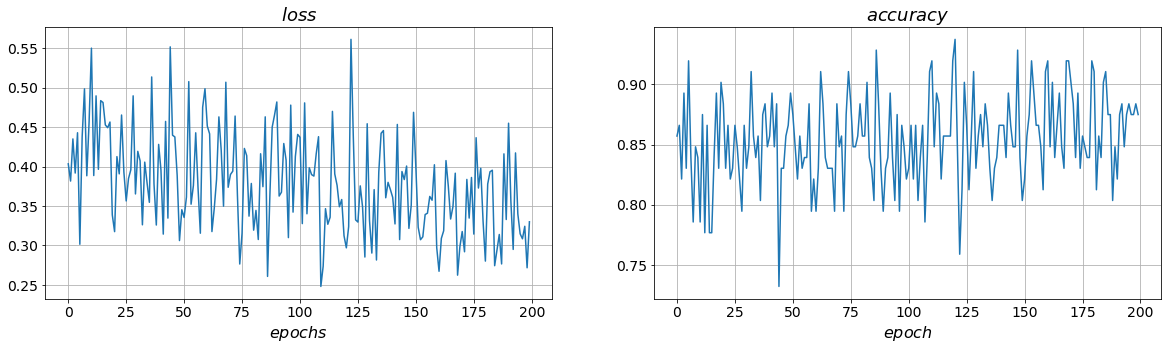

In [42]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.figure(figsize=(20,5))
plt.subplots_adjust(wspace=0.2)

plt. subplot(1,2,1)
plt.title("$loss$",fontsize = 18)
plt.plot(losses)
plt.grid()
plt.xlabel("$epochs$",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.subplot(1,2,2)
plt.title("$accuracy$",fontsize = 18)
plt.plot(accuracies)
plt.grid()
plt.xlabel("$epoch$",fontsize=16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.show()

In [43]:
# TEST 모델 성능 평가

output = net(X_test)
print(torch.max(output,dim=1))
_,predicted = torch.max(output, dim=1)
accuracy = round((predicted == y_test).sum().item() / len(y_test),4)

print("Test_set accuracy :", round(accuracy,4))

torch.return_types.max(
values=tensor([4.7558, 3.3810, 2.8712, 1.4228, 3.5369, 2.6377, 3.8714, 2.1828, 4.0235,
        2.5657, 2.3908, 2.6676, 1.7816, 3.0538, 3.9099, 3.8008, 2.9396, 2.8588,
        3.4471, 2.9285, 1.1732, 3.3835, 4.1405, 2.0341, 1.8439, 1.8747, 3.7057,
        2.0401, 4.6898, 3.3731, 4.3557, 1.2259, 2.7016, 1.6506, 3.4459, 2.7651,
        2.0692, 2.8094], grad_fn=<MaxBackward0>),
indices=tensor([2, 2, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 1, 0, 1, 1, 2, 2, 0,
        2, 0, 0, 0, 2, 0, 1, 0, 0, 2, 0, 2, 1, 2]))
Test_set accuracy : 0.8947
